In [2]:
import numpy as np
import warnings
import pandas as pd
from sklearn.preprocessing import scale
from pandas import DataFrame
from sklearn.cluster import KMeans, SpectralClustering, DBSCAN, AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster import hierarchy
import cluster
import kmedoids
import gower

In [3]:
raw_df = pd.read_csv("heart_disease_patients.csv")

warnings.filterwarnings('ignore')

# Preprocessing

In [5]:
raw_df = raw_df.drop(raw_df.columns[0], axis=1) #delete id

print(raw_df.dtypes)
raw_df.describe()

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
dtype: object


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000


In [6]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df = DataFrame(scale(raw_df), index=raw_df.index, columns=raw_df.columns)
print(df.dtypes)
df.describe()
# co z odstajacymi?

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
dtype: object


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
count,303.00000,303.00000,303.00000,303.00000,303.00000,303.00000,303.00000,303.00000,303.00000,303.00000,303.00000
mean,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000
std,1.00165,1.00165,1.00165,1.00165,1.00165,1.00165,1.00165,1.00165,1.00165,1.00165,1.00165
min,-2.81911,-1.45730,-2.25177,-2.14504,-2.33488,-0.41763,-0.99675,-3.44207,-0.69663,-0.89686,-0.97635
25%,-0.71356,-1.45730,-0.16527,-0.66530,-0.69050,-0.41763,-0.99675,-0.70531,-0.69663,-0.89686,-0.97635
50%,0.17299,0.68620,-0.16527,-0.09617,-0.11014,-0.41763,0.00997,0.14856,-0.69663,-0.20671,0.64911
75%,0.72709,0.68620,0.87799,0.47296,0.54761,-0.41763,1.01668,0.71781,1.43548,0.48345,0.64911
max,2.50019,0.68620,0.87799,3.88774,6.13849,2.39444,1.01668,2.29418,1.43548,4.45185,2.27458


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>],
       [<AxesSubplot:title={'center':'trestbps'}>,
        <AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>],
       [<AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>,
        <AxesSubplot:title={'center':'exang'}>],
       [<AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>, <AxesSubplot:>]],
      dtype=object)

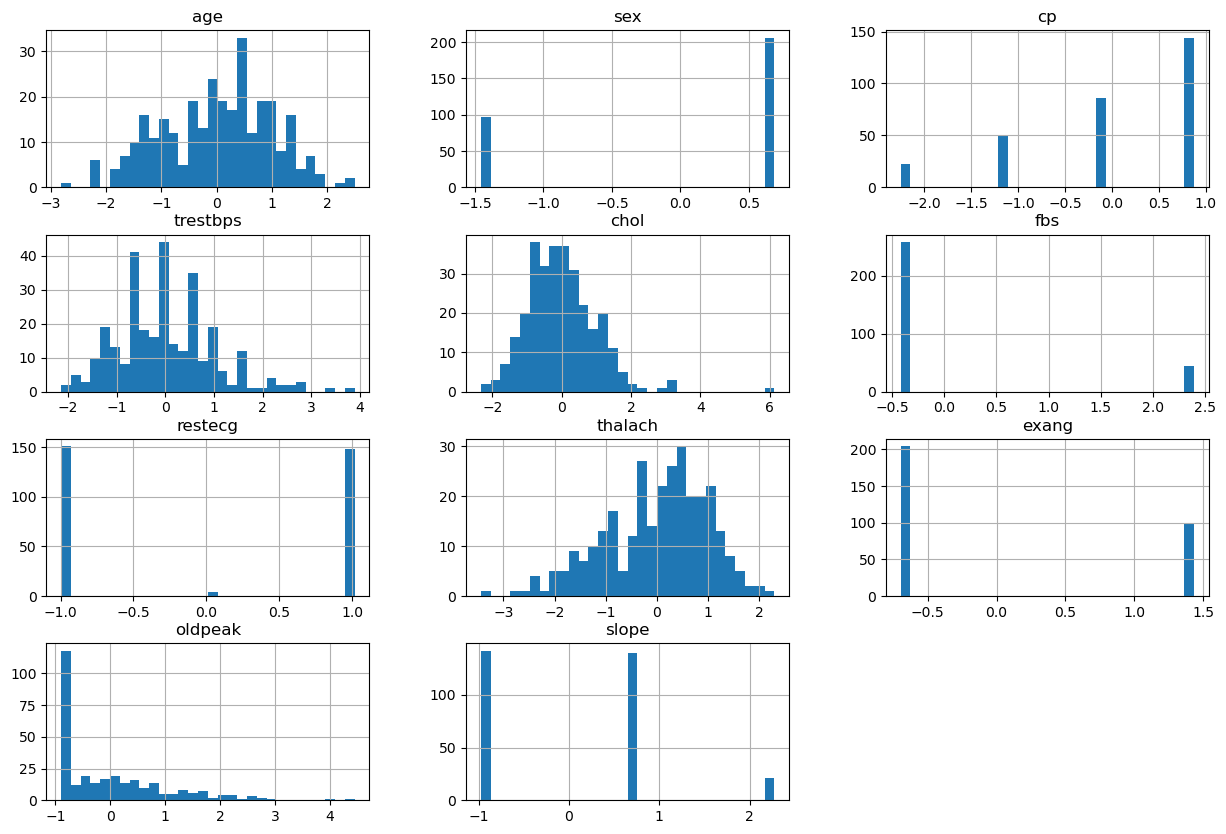

In [7]:
df.hist(bins=30, figsize=(15, 10))

In [8]:
df.corr()
# korelacje nieduże

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
age,1.00000,-0.09754,0.10414,0.28495,0.20895,0.11853,0.14887,-0.39381,0.09166,0.20381,0.16177
sex,-0.09754,1.00000,0.01008,-0.06446,-0.19991,0.04786,0.02165,-0.04866,0.14620,0.10217,0.03753
cp,0.10414,0.01008,1.00000,-0.03608,0.07232,-0.03997,0.06751,-0.33442,0.38406,0.20228,0.15205
trestbps,0.28495,-0.06446,-0.03608,1.00000,0.13012,0.17534,0.14656,-0.04535,0.06476,0.18917,0.11738
chol,0.20895,-0.19991,0.07232,0.13012,1.00000,0.00984,0.17104,-0.00343,0.06131,0.04656,-0.00406
fbs,0.11853,0.04786,-0.03997,0.17534,0.00984,1.00000,0.06956,-0.00785,0.02567,0.00575,0.05989
restecg,0.14887,0.02165,0.06751,0.14656,0.17104,0.06956,1.00000,-0.08339,0.08487,0.11413,0.13395
thalach,-0.39381,-0.04866,-0.33442,-0.04535,-0.00343,-0.00785,-0.08339,1.00000,-0.37810,-0.34309,-0.38560
exang,0.09166,0.14620,0.38406,0.06476,0.06131,0.02567,0.08487,-0.37810,1.00000,0.28822,0.25775
oldpeak,0.20381,0.10217,0.20228,0.18917,0.04656,0.00575,0.11413,-0.34309,0.28822,1.00000,0.57754


# First approach

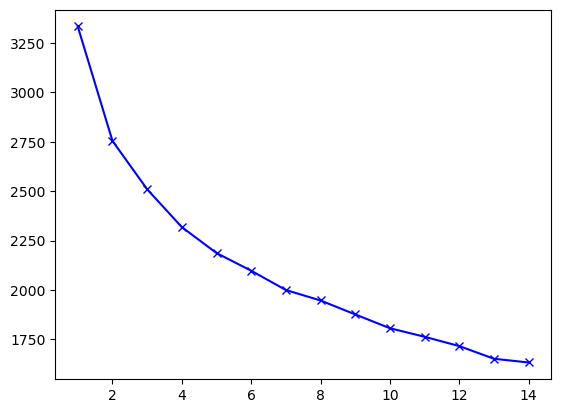

In [9]:
inertias = []
for i in range(1,15):
    kmeanTest = KMeans(n_clusters=i)
    kmeanTest.fit(df)
    inertias.append(kmeanTest.inertia_)

plt.plot(range(1,15), inertias, 'bx-')
plt.show()

In [10]:
# Hard to say where the elbow is - we need to find another method

In [11]:
def metrics_plots(max_k=10):

    score = []
    score_kmeans_s = []
    score_kmeans_c = []
    score_kmeans_d = []

    for k in range(2, max_k):
        kmeans = KMeans(n_clusters=k, random_state= 42)
        predictions = kmeans.fit_predict(df)
        # Calculate cluster validation metrics and append to lists of metrics
        score.append(kmeans.score(df))
        score_kmeans_s.append(silhouette_score(df, kmeans.labels_, metric='euclidean'))
        score_kmeans_c.append(calinski_harabasz_score(df, kmeans.labels_))
        score_kmeans_d.append(davies_bouldin_score(df, predictions))

    list_scores = [score, score_kmeans_s, score_kmeans_c, score_kmeans_d]
    # Elbow Method plot
    list_title = ['Within-cluster sum of squares', 'Silhouette Score', 'Calinski Harabasz', 'Davies Bouldin']
    for i in range(len(list_scores)):
        x_ticks = list(range(2, len(list_scores[i]) + 2))
        plt.plot(x_ticks, list_scores[i], 'bx-')
        plt.xlabel('k')
        plt.ylabel(list_title[i])
        plt.title('Optimal k')
        plt.show()

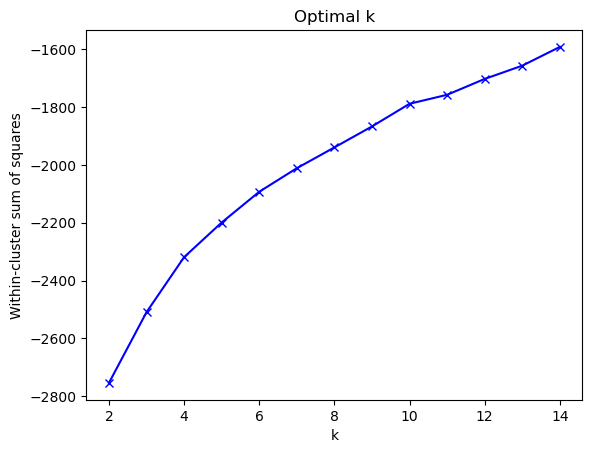

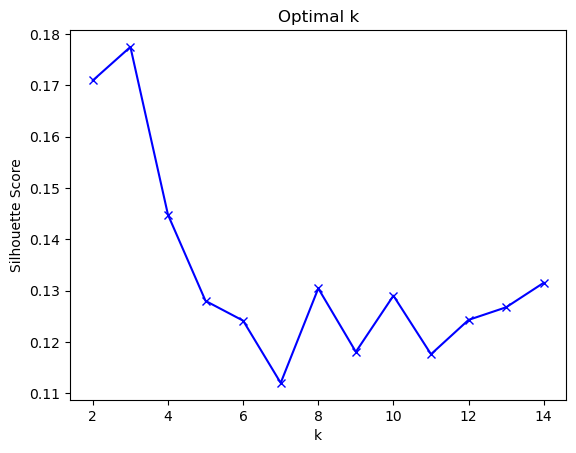

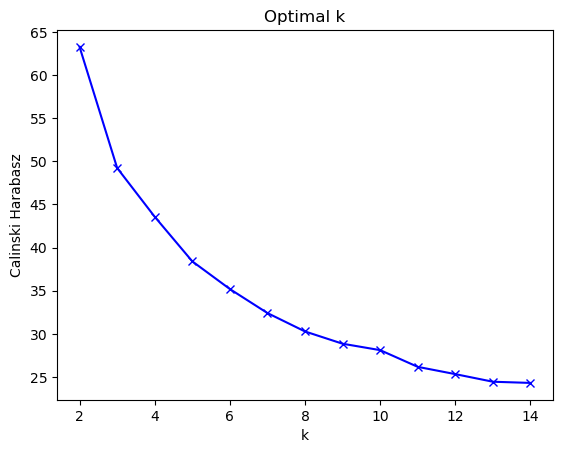

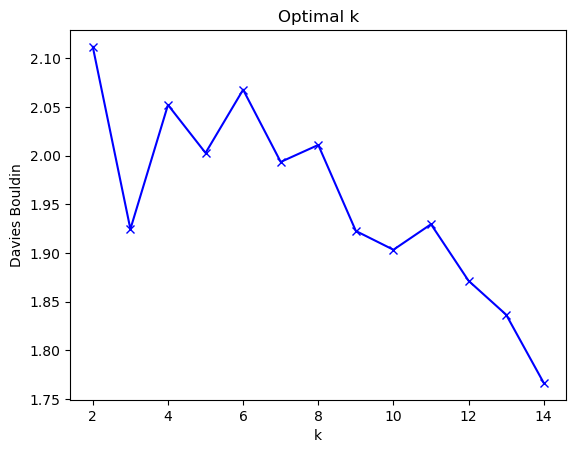

In [12]:
metrics_plots(max_k=15)
# still not it

In [13]:
def _MiniBatchKMeans(X, n_clusters):
    miniBatchKmeans = cluster.MiniBatchKMeans(n_clusters=n_clusters)
    miniBatchKmeans.fit(X)
    return X, miniBatchKmeans

## Gower distance

In [14]:
# gower distance

distance_matrix = gower.gower_matrix(raw_df)
print(distance_matrix)
print(np.amax(distance_matrix))
(distance_matrix < 0.05).sum()/303

[[0.         0.39049911 0.36700067 ... 0.49490738 0.332806   0.44840893]
 [0.39049911 0.         0.0768382  ... 0.17700507 0.36526603 0.42150822]
 [0.36700067 0.0768382  0.         ... 0.16900854 0.34074435 0.40780288]
 ...
 [0.49490738 0.17700507 0.16900854 ... 0.         0.4136657  0.27649012]
 [0.332806   0.36526603 0.34074435 ... 0.4136657  0.         0.3137765 ]
 [0.44840893 0.42150822 0.40780288 ... 0.27649012 0.3137765  0.        ]]
0.73201615


2.4983498349834985

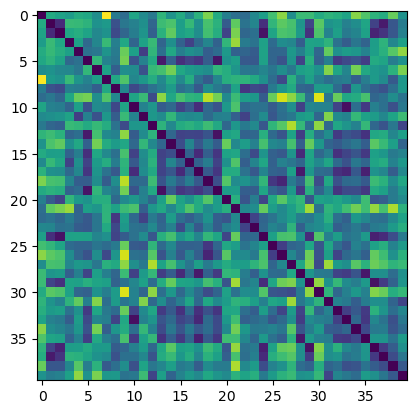

In [15]:
plt.imshow(distance_matrix[0:40, 0:40])
# partial gower-distance matrix (part of 303x303 matrix)

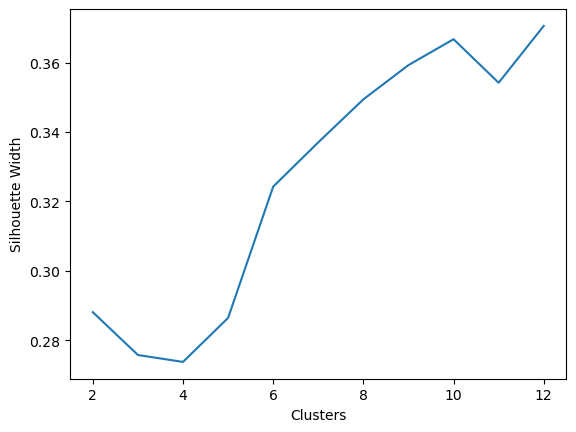

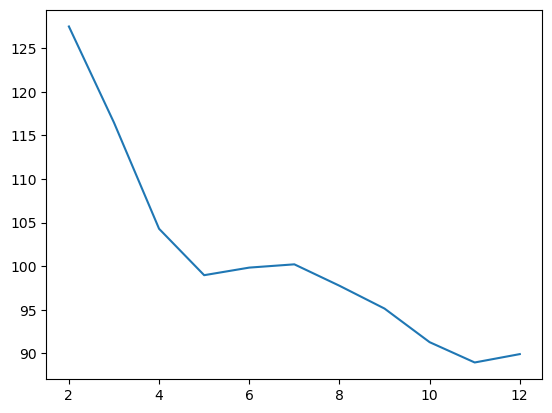

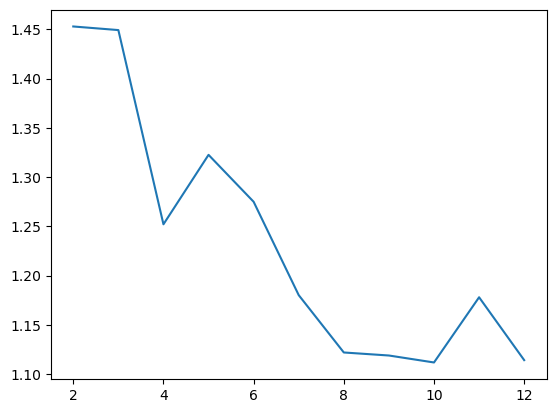

In [16]:
silhouette = []
silhouette.append(np.nan)
calinski_harabasz=[]
calinski_harabasz.append(np.nan)
davies_bouldin=[]
davies_bouldin.append(np.nan)
                              

for i in range(2, 13):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(distance_matrix)
    silhouette.append(silhouette_score(distance_matrix, kmeans.labels_))
    calinski_harabasz.append(calinski_harabasz_score(distance_matrix, kmeans.labels_))
    davies_bouldin.append(davies_bouldin_score(distance_matrix, kmeans.labels_))
    

plt.plot(range(1, 13), silhouette)
plt.xlabel("Clusters")
plt.ylabel("Silhouette Width")
plt.show()
plt.plot(range(1, 13), calinski_harabasz)
plt.show()
plt.plot(range(1, 13), davies_bouldin)
plt.show()

In [17]:
km = kmedoids.KMedoids(5, method='fasterpam')
c = km.fit(distance_matrix)
print("Loss is:", c.inertia_)

Loss is: 38.39692799281329


Text(0, 0.5, 'Silhouette Width')

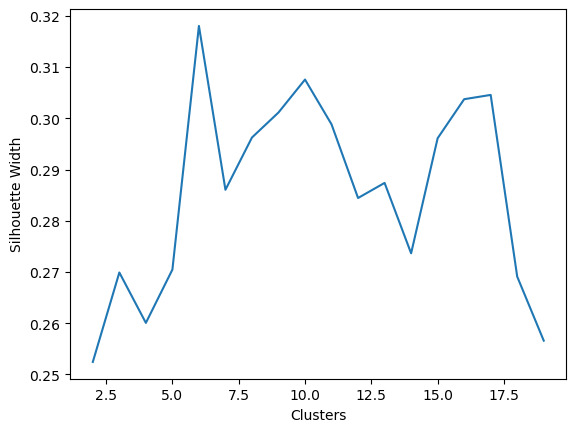

In [18]:
silhouette = []
silhouette.append(np.nan)           

for i in range(2, 20):
    kmeds = kmedoids.KMedoids(n_clusters=i)
    kmeds.fit(distance_matrix)
    silhouette.append(silhouette_score(distance_matrix, kmeds.labels_))
    calinski_harabasz.append(calinski_harabasz_score(distance_matrix, kmeans.labels_))
    davies_bouldin.append(davies_bouldin_score(distance_matrix, kmeans.labels_))
    
plt.plot(range(1, 20), silhouette)
plt.xlabel("Clusters")
plt.ylabel("Silhouette Width")
# a więc powiedzmy ze 6 clusterów

In [19]:
km_model = kmedoids.KMedoids(n_clusters = 6, random_state = 0, metric = 'precomputed', method = 'pam').fit(distance_matrix)  

kmed_y = km_model.labels_
kmed_y

array([4, 2, 2, 5, 1, 5, 1, 0, 4, 2, 5, 1, 2, 5, 5, 5, 5, 5, 0, 5, 2, 1,
       4, 4, 2, 0, 0, 0, 5, 2, 0, 3, 5, 5, 5, 5, 2, 2, 3, 3, 1, 5, 0, 5,
       1, 4, 5, 4, 1, 4, 0, 5, 4, 4, 3, 2, 5, 4, 4, 2, 3, 1, 2, 0, 3, 2,
       4, 4, 2, 5, 0, 5, 3, 4, 4, 1, 2, 1, 4, 2, 2, 1, 4, 2, 5, 4, 4, 1,
       1, 1, 4, 1, 5, 0, 1, 3, 2, 1, 5, 4, 4, 4, 1, 1, 5, 5, 3, 4, 3, 5,
       2, 2, 4, 2, 0, 5, 4, 0, 2, 4, 2, 1, 3, 3, 4, 1, 2, 3, 5, 0, 4, 5,
       4, 2, 0, 1, 3, 4, 3, 4, 5, 4, 5, 3, 2, 5, 4, 5, 4, 0, 5, 1, 1, 2,
       2, 4, 3, 4, 4, 5, 5, 2, 0, 1, 5, 3, 5, 1, 2, 0, 3, 2, 3, 1, 4, 3,
       5, 2, 5, 4, 4, 2, 4, 4, 1, 0, 5, 3, 4, 4, 5, 3, 2, 0, 1, 2, 4, 2,
       0, 4, 1, 0, 5, 0, 5, 2, 2, 2, 5, 3, 0, 3, 4, 3, 5, 4, 0, 2, 0, 4,
       1, 1, 0, 3, 3, 0, 5, 0, 2, 2, 1, 2, 4, 1, 0, 2, 2, 4, 0, 5, 5, 0,
       0, 5, 0, 3, 5, 2, 5, 4, 3, 3, 3, 1, 5, 0, 0, 1, 4, 5, 0, 1, 0, 5,
       2, 3, 3, 5, 5, 5, 2, 4, 3, 0, 5, 4, 1, 0, 4, 0, 3, 5, 2, 5, 5, 4,
       2, 5, 4, 5, 4, 0, 3, 2, 3, 5, 4, 3, 5, 3, 3,

In [20]:
np.histogram(kmed_y, bins=range(7))

(array([42, 39, 52, 41, 61, 68]), array([0, 1, 2, 3, 4, 5, 6]))

## Aglomerative clustering

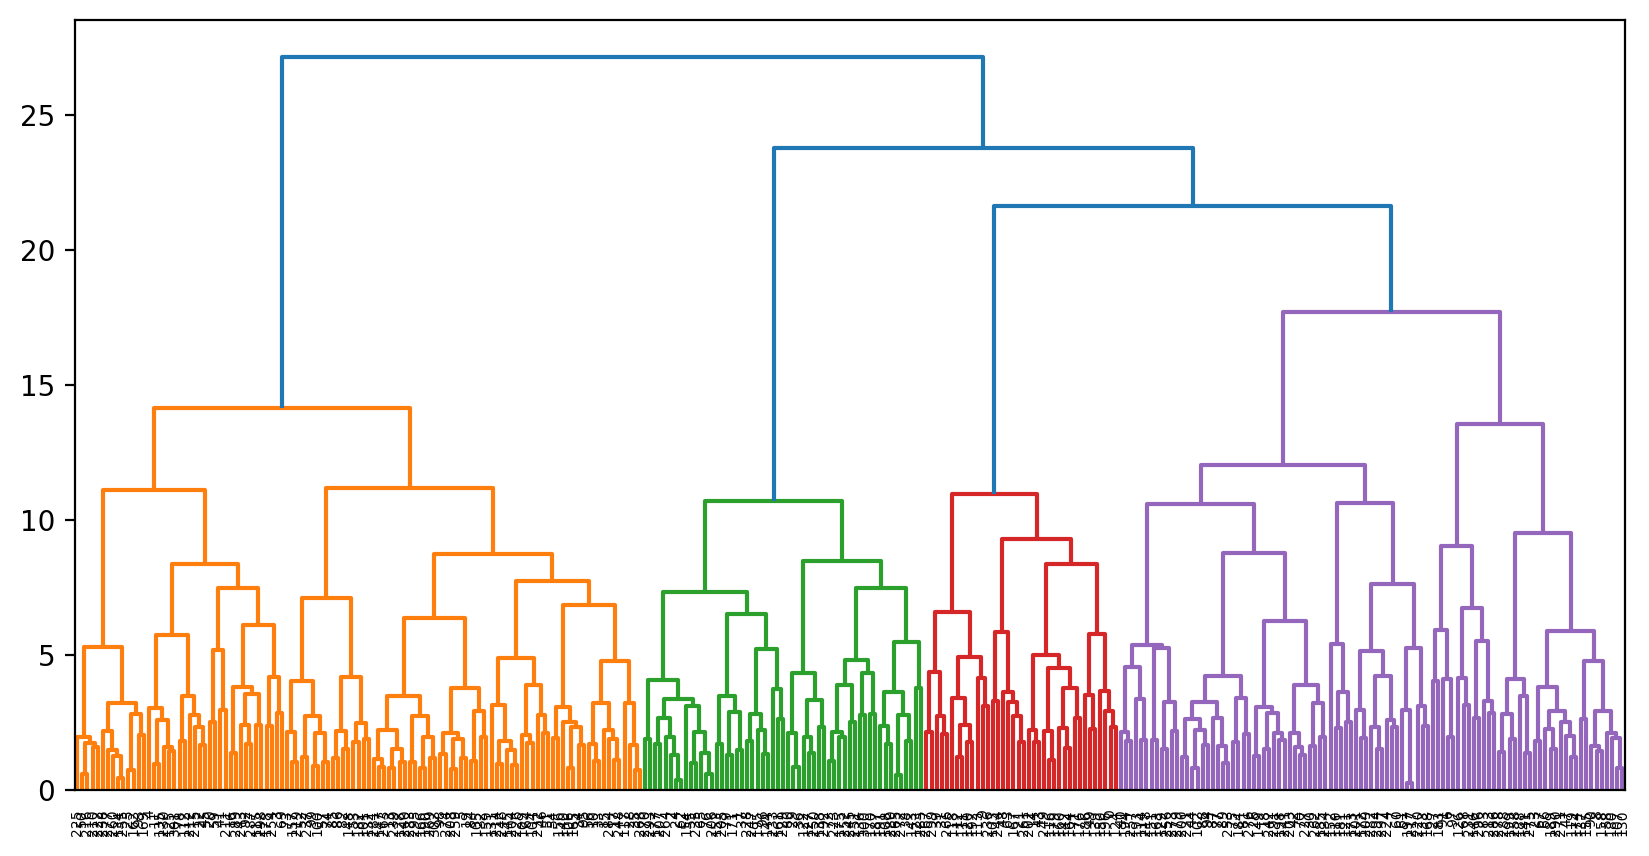

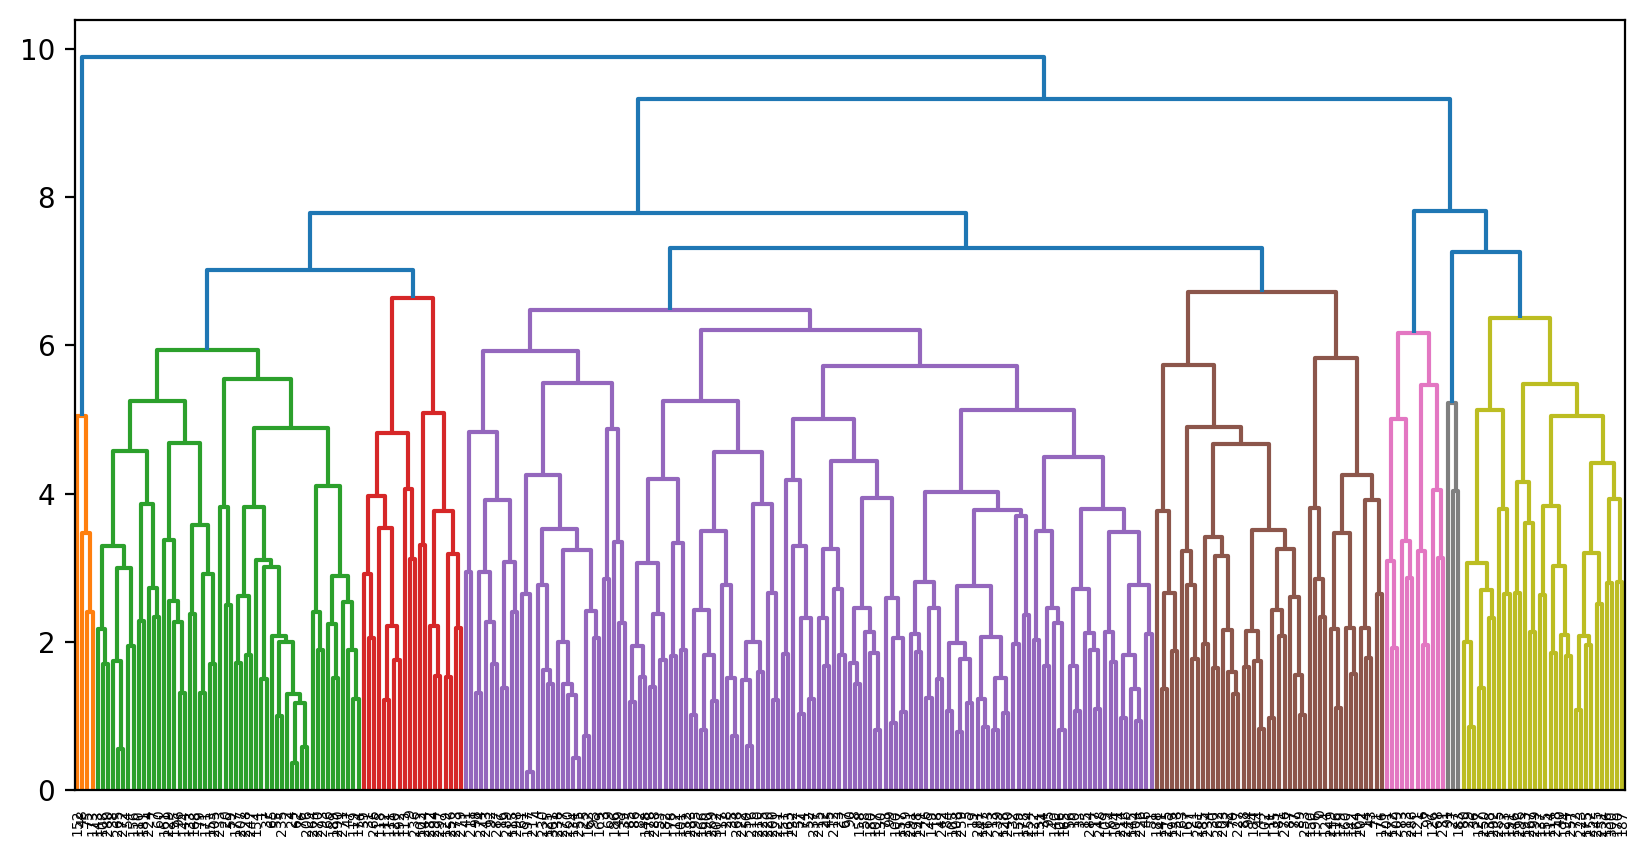

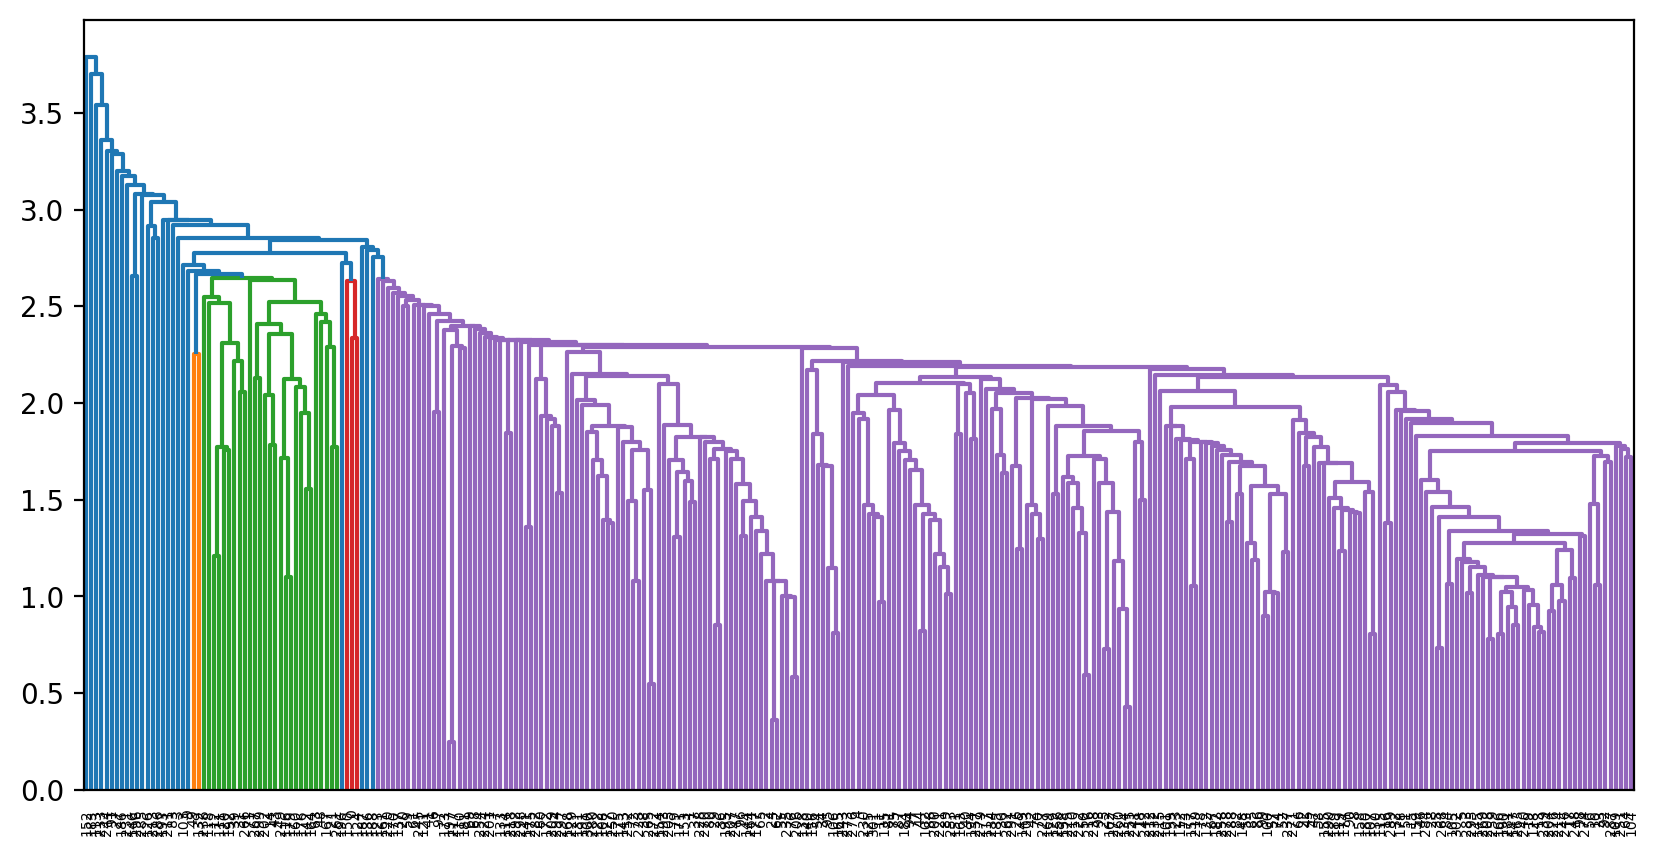

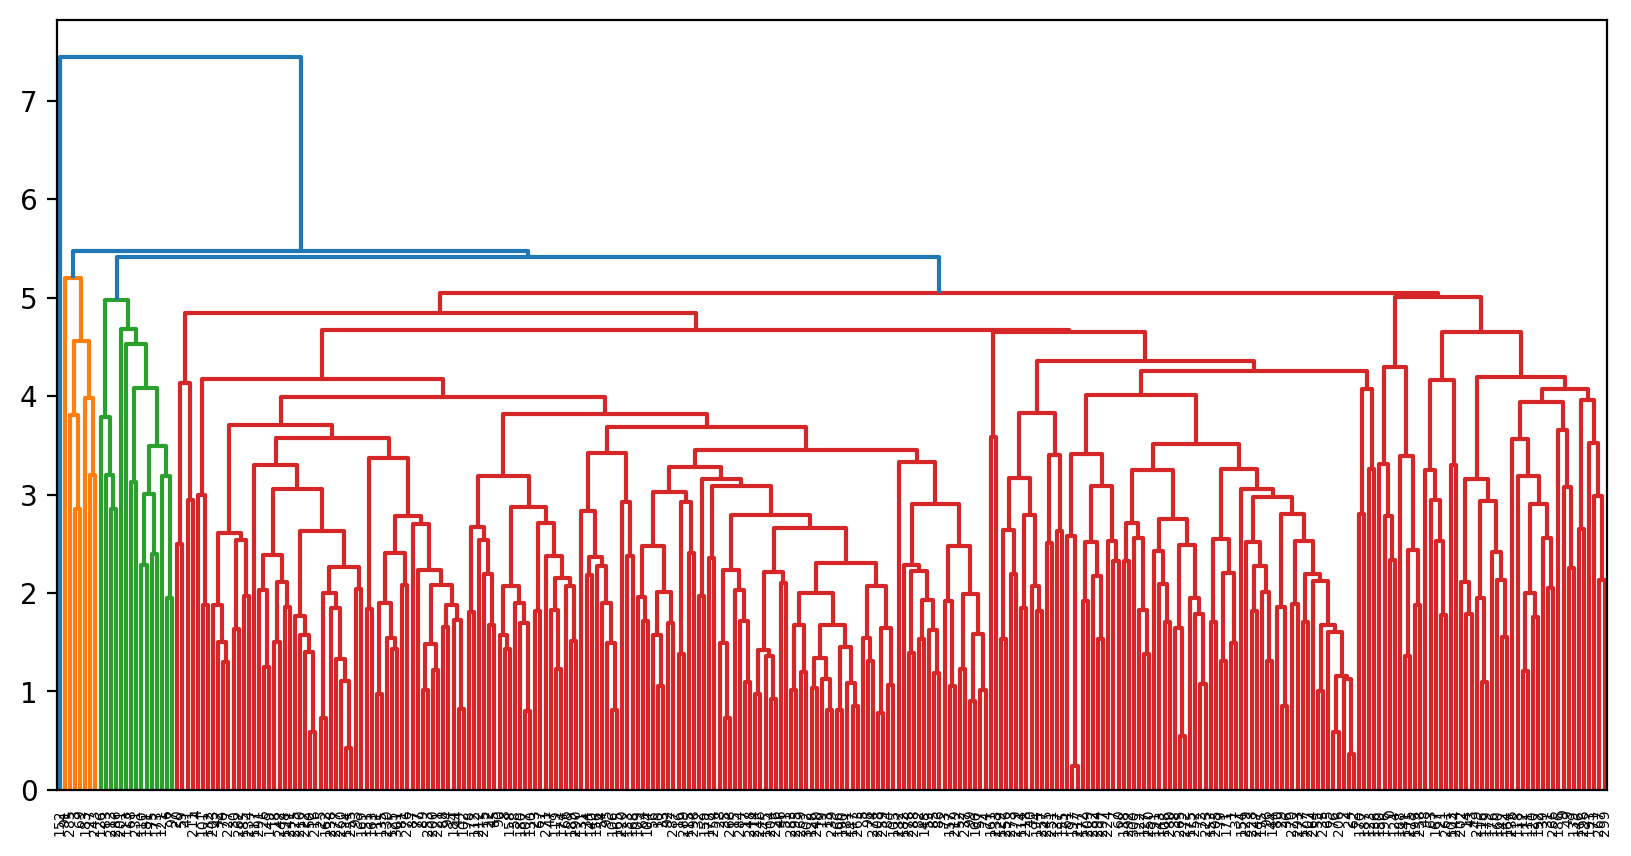

In [22]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

for method in ['ward', 'complete', 'single', 'average']:
    Z = hierarchy.linkage(df, method=method)
    plt.figure(figsize=(10, 5), dpi= 200, facecolor='w', edgecolor='k')
    hierarchy.dendrogram(Z)
    plt.show()

In [23]:
agglModel = AgglomerativeClustering(n_clusters=8, linkage='ward')
aggl_y = agglModel.fit_predict(df)
aggl_y

array([1, 5, 5, 2, 2, 0, 6, 3, 4, 1, 0, 2, 1, 0, 1, 0, 2, 0, 7, 0, 2, 1,
       2, 4, 5, 2, 7, 6, 0, 5, 7, 1, 0, 0, 0, 0, 5, 5, 5, 1, 7, 2, 7, 1,
       7, 2, 0, 4, 1, 1, 2, 0, 0, 0, 0, 5, 0, 0, 4, 2, 3, 3, 5, 1, 0, 5,
       4, 4, 6, 2, 7, 1, 5, 0, 0, 7, 5, 7, 2, 5, 5, 7, 0, 6, 0, 0, 0, 7,
       7, 7, 4, 6, 2, 2, 7, 0, 5, 6, 0, 0, 0, 0, 7, 1, 0, 0, 0, 4, 5, 0,
       3, 1, 2, 1, 7, 2, 1, 0, 1, 4, 1, 3, 5, 5, 1, 2, 6, 5, 0, 7, 4, 0,
       0, 3, 2, 2, 5, 4, 5, 1, 0, 4, 1, 5, 5, 0, 6, 0, 0, 7, 1, 7, 3, 5,
       5, 4, 0, 0, 4, 0, 1, 5, 2, 7, 1, 0, 0, 1, 3, 2, 5, 5, 3, 3, 4, 5,
       1, 5, 2, 1, 4, 3, 0, 6, 7, 7, 1, 5, 4, 4, 0, 5, 1, 7, 7, 5, 1, 3,
       7, 4, 7, 3, 1, 7, 0, 5, 5, 5, 0, 3, 2, 2, 2, 6, 0, 2, 2, 3, 7, 0,
       3, 7, 2, 5, 3, 2, 0, 7, 5, 5, 2, 6, 0, 5, 7, 5, 1, 0, 2, 0, 0, 7,
       7, 2, 1, 5, 0, 5, 0, 1, 5, 5, 5, 7, 2, 2, 7, 7, 4, 0, 2, 1, 7, 0,
       5, 5, 1, 1, 0, 0, 5, 4, 5, 7, 0, 4, 7, 2, 4, 7, 5, 0, 3, 0, 0, 5,
       6, 2, 4, 2, 4, 7, 5, 5, 3, 0, 6, 3, 2, 1, 5,

In [24]:
np.histogram(aggl_y, bins=range(9))

(array([70, 38, 41, 20, 25, 55, 13, 41]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]))

In [25]:
def plotFeatures(df, feature1, feature2, y):
    plt.scatter(df[feature1], df[feature2], c=y, s=10, cmap='viridis')
    plt.ylabel(feature2)
    plt.xlabel(feature1)
    plt.show()

## DBSCAN

In [27]:
def _DBSCAN(X, eps=2, min_samples=5):
    dbs = DBSCAN(eps=eps, min_samples=min_samples)
    y = dbs.fit_predict(X)
    return y, dbs

# db_y, dbs = _DBSCAN(df, 2.5, 2)

In [28]:
for i in range(10):
    print(1+i/5)
    for j in range(4):
        db_y, _ = _DBSCAN(df, 1+i/5, 2+j)
        print(np.histogram(db_y, bins=range(-1,8)))

1.0
(array([258,   2,   4,   2,   2,   2,   2,   4]), array([-1,  0,  1,  2,  3,  4,  5,  6,  7]))
(array([290,   4,   3,   3,   3,   0,   0,   0]), array([-1,  0,  1,  2,  3,  4,  5,  6,  7]))
(array([299,   4,   0,   0,   0,   0,   0,   0]), array([-1,  0,  1,  2,  3,  4,  5,  6,  7]))
(array([303,   0,   0,   0,   0,   0,   0,   0]), array([-1,  0,  1,  2,  3,  4,  5,  6,  7]))
1.2
(array([228,   7,  18,   2,   2,   2,   2,   4]), array([-1,  0,  1,  2,  3,  4,  5,  6,  7]))
(array([260,   7,  18,   4,   4,   3,   4,   3]), array([-1,  0,  1,  2,  3,  4,  5,  6,  7]))
(array([274,   6,  15,   4,   4,   0,   0,   0]), array([-1,  0,  1,  2,  3,  4,  5,  6,  7]))
(array([288,   6,   9,   0,   0,   0,   0,   0]), array([-1,  0,  1,  2,  3,  4,  5,  6,  7]))
1.4
(array([197,   9,  28,   2,   2,   2,   2,   4]), array([-1,  0,  1,  2,  3,  4,  5,  6,  7]))
(array([241,   9,  28,   3,   4,   3,   5,   7]), array([-1,  0,  1,  2,  3,  4,  5,  6,  7]))
(array([261,   9,  25,   4,   4,   0, 

In [29]:
# not good results here

## Spectral clustering

In [31]:
for i in range(3,10):
    sc = SpectralClustering(n_clusters=i)
    sc_y = sc.fit_predict(df)
    print(np.histogram(sc_y, bins=range(i+1)))

(array([191,  44,  68]), array([0, 1, 2, 3]))
(array([191,  17,  27,  68]), array([0, 1, 2, 3, 4]))
(array([199,  27,  17,  57,   3]), array([0, 1, 2, 3, 4, 5]))
(array([ 17, 190,   5,   2,  20,  69]), array([0, 1, 2, 3, 4, 5, 6]))
(array([ 69,   5,  17,  20, 119,   2,  71]), array([0, 1, 2, 3, 4, 5, 6, 7]))
(array([121,   5,  17,  20,  72,  63,   2,   3]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]))
(array([ 33,   5,  17, 122,  20,  73,   3,   2,  28]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))


In [32]:
### Dość słabe wyniki - nowe podejście przez odległości gowera


In [33]:
import copy
df = copy.deepcopy(raw_df)
df

df['sex'] = np.where(df['sex']==1, 'val1',
                   np.where(df['sex']==0, 'val0', 'val'))
df['cp'] = np.where(df['cp']==1, 'val1',
                    np.where(df['cp']==2, 'val2',
                    np.where(df['cp']==3, 'val3', 
                    np.where(df['cp']==4, 'val4', 'val'))))
df['fbs'] = np.where(df['fbs']==1, 'val1',
                    np.where(df['fbs']==0, 'val0', 'val'))
df['restecg'] = np.where(df['restecg']==0, 'val0',
                    np.where(df['restecg']==1, 'val1',
                    np.where(df['restecg']==2, 'val2', 'val')))
df['exang'] = np.where(df['exang']==1, 'val1',
                    np.where(df['exang']==0, 'val0', 'val'))
df['slope'] = np.where(df['slope']==3, 'val3',
                    np.where(df['slope']==1, 'val1',
                    np.where(df['slope']==2, 'val2', 'val')))

print(df.dtypes)
df.describe()

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
dtype: object


,age,trestbps,chol,thalach,oldpeak
count,303.00000,303.00000,303.00000,303.00000,303.00000
mean,54.43894,131.68977,246.69307,149.60726,1.03960
std,9.03866,17.59975,51.77692,22.87500,1.16108
min,29.00000,94.00000,126.00000,71.00000,0.00000
25%,48.00000,120.00000,211.00000,133.50000,0.00000
50%,56.00000,130.00000,241.00000,153.00000,0.80000
75%,61.00000,140.00000,275.00000,166.00000,1.60000
max,77.00000,200.00000,564.00000,202.00000,6.20000


In [34]:
distance_matrix = gower.gower_matrix(df)
raw_distance_matrix = gower.gower_matrix(raw_df)
print(distance_matrix)
print()
print(raw_distance_matrix)

[[0.         0.43595368 0.4124552  ... 0.54036194 0.43886662 0.47871193]
 [0.43595368 0.         0.0768382  ... 0.17700507 0.39556906 0.5275688 ]
 [0.4124552  0.0768382  0.         ... 0.16900854 0.37104738 0.5138635 ]
 ...
 [0.54036194 0.17700507 0.16900854 ... 0.         0.44396874 0.38255075]
 [0.43886662 0.39556906 0.37104738 ... 0.44396874 0.         0.4198371 ]
 [0.47871193 0.5275688  0.5138635  ... 0.38255075 0.4198371  0.        ]]

[[0.         0.39049911 0.36700067 ... 0.49490738 0.332806   0.44840893]
 [0.39049911 0.         0.0768382  ... 0.17700507 0.36526603 0.42150822]
 [0.36700067 0.0768382  0.         ... 0.16900854 0.34074435 0.40780288]
 ...
 [0.49490738 0.17700507 0.16900854 ... 0.         0.4136657  0.27649012]
 [0.332806   0.36526603 0.34074435 ... 0.4136657  0.         0.3137765 ]
 [0.44840893 0.42150822 0.40780288 ... 0.27649012 0.3137765  0.        ]]


In [35]:
# on average point is less than 0.1 in distance with 5.5 other points
print((distance_matrix < 0.1).sum()/303)

tmp = (distance_matrix < 0.2).sum(axis=1)

(tmp > 5).sum()


6.4983498349834985


293

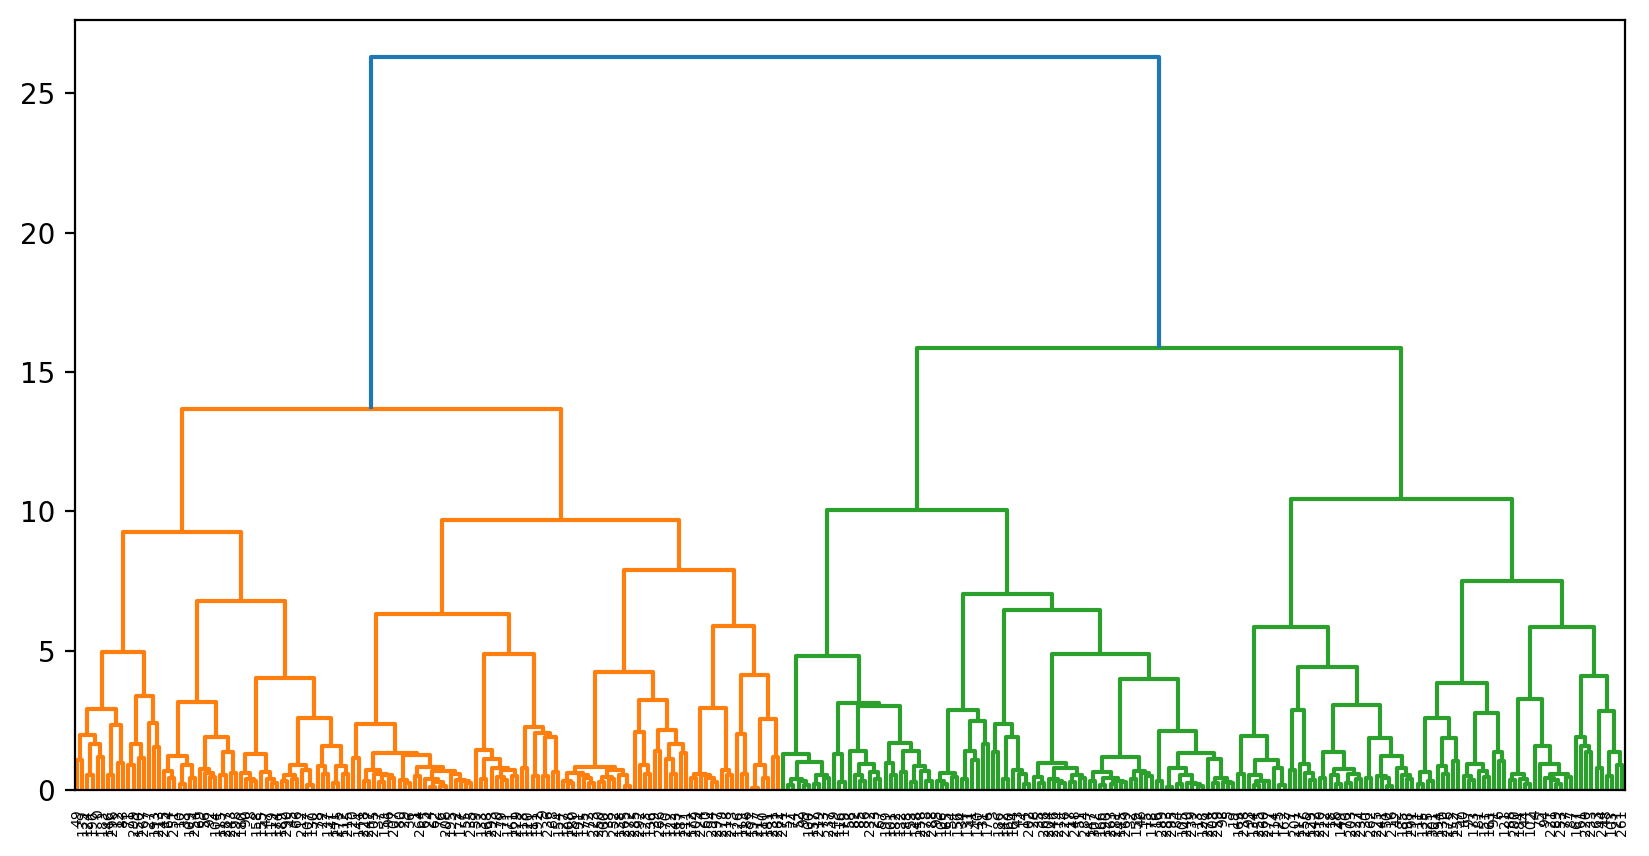

In [36]:
Z = hierarchy.linkage(distance_matrix, method='ward')
plt.figure(figsize=(10,5), dpi=200)
hierarchy.dendrogram(Z)
plt.show()

In [37]:
# We can assume 4 clusters
agglModelGower = AgglomerativeClustering(n_clusters=4, linkage='ward')
agglModelGower.fit(distance_matrix)
aggl_y = agglModelGower.labels_
aggl_y


array([3, 1, 1, 2, 0, 2, 0, 0, 3, 1, 3, 0, 3, 2, 2, 2, 2, 2, 0, 2, 1, 0,
       3, 2, 1, 0, 0, 3, 2, 1, 0, 2, 2, 3, 2, 2, 1, 1, 1, 1, 0, 2, 0, 2,
       0, 3, 2, 3, 0, 3, 0, 2, 2, 2, 2, 1, 3, 2, 2, 1, 1, 0, 1, 0, 3, 1,
       3, 2, 1, 3, 0, 3, 1, 2, 2, 0, 1, 0, 3, 1, 1, 0, 2, 3, 2, 2, 2, 0,
       0, 0, 3, 0, 3, 0, 0, 2, 1, 0, 2, 2, 2, 2, 0, 0, 3, 2, 2, 3, 1, 3,
       1, 1, 3, 1, 0, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 1, 2, 0, 3, 2,
       2, 1, 0, 0, 1, 3, 1, 3, 2, 3, 2, 1, 1, 2, 3, 2, 2, 0, 3, 0, 0, 1,
       1, 3, 2, 2, 3, 2, 2, 1, 0, 0, 2, 2, 2, 0, 1, 0, 1, 1, 1, 0, 3, 1,
       2, 1, 2, 2, 3, 1, 2, 3, 0, 0, 2, 1, 2, 3, 2, 1, 1, 3, 0, 1, 3, 1,
       0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 1, 0, 1, 3, 3, 2, 3, 0, 1, 1, 2,
       0, 0, 0, 1, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 0, 1, 1, 2, 0, 2, 2, 0,
       0, 3, 0, 3, 2, 1, 2, 2, 1, 3, 1, 0, 3, 0, 0, 0, 2, 2, 0, 0, 0, 2,
       1, 1, 1, 3, 2, 2, 1, 2, 1, 1, 2, 3, 0, 0, 2, 1, 1, 2, 1, 2, 2, 1,
       1, 3, 2, 2, 3, 0, 1, 1, 1, 2, 3, 1, 3, 3, 1,

In [41]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.ensemble import RandomForestClassifier
importances = []
feature_names = [f"feature {col}" for col in df.columns]
forest = RandomForestClassifier(random_state=0)
forest.fit(raw_df, aggl_y)
for i in range(4):
    perm = PermutationImportance(forest, random_state=1).fit(raw_df[aggl_y == i], aggl_y[aggl_y == i])
    importances.append(eli5.show_weights(perm, feature_names=feature_names))

In [43]:
importances[0]


Weight,Feature
0.0429 ± 0.0243,feature sex
0.0381 ± 0.0095,feature exang
0.0167 ± 0.0190,feature restecg
0.0167 ± 0.0117,feature slope
0.0071 ± 0.0117,feature cp
0.0024 ± 0.0095,feature thalach
0.0024 ± 0.0095,feature trestbps
0 ± 0.0000,feature oldpeak
0 ± 0.0000,feature fbs
0 ± 0.0000,feature chol


In [44]:
importances[1]

Weight,Feature
0.0429 ± 0.0243,feature sex
0.0381 ± 0.0095,feature exang
0.0167 ± 0.0190,feature restecg
0.0167 ± 0.0117,feature slope
0.0071 ± 0.0117,feature cp
0.0024 ± 0.0095,feature thalach
0.0024 ± 0.0095,feature trestbps
0 ± 0.0000,feature oldpeak
0 ± 0.0000,feature fbs
0 ± 0.0000,feature chol


In [45]:
importances[2]

Weight,Feature
0.0337 ± 0.0142,feature slope
0.0292 ± 0.0229,feature exang
0.0090 ± 0.0090,feature thalach
0.0067 ± 0.0110,feature chol
0.0022 ± 0.0090,feature oldpeak
0.0022 ± 0.0090,feature restecg
0.0022 ± 0.0090,feature trestbps
0.0022 ± 0.0090,feature cp
0 ± 0.0000,feature fbs
0 ± 0.0000,feature sex


In [46]:
importances[3]

Weight,Feature
0.0704 ± 0.0148,feature exang
0.0407 ± 0.0277,feature thalach
0.0407 ± 0.0277,feature sex
0.0370 ± 0.0234,feature cp
0.0185 ± 0.0000,feature trestbps
0.0148 ± 0.0277,feature oldpeak
0 ± 0.0000,feature slope
0 ± 0.0000,feature restecg
0 ± 0.0000,feature fbs
0 ± 0.0000,feature chol


# Conclusions

Everywhere, the variable ‘exang’ has an impact because cluster {0} contains values indicative of coronary disease, while the rest do not.

**Quick Overview**: Age seems to have little significance. Almost everyone has high cholesterol levels, and the 'restecg' is evenly distributed.

### We can try to assign certain heart diseases to patients in each cluster
- Cluster 1: Possibly coronary disease - angina and male patients. Mainly type 4 pain (whatever that means), high ‘oldpeak,’ and predominantly ‘slope’ value 2.
- Cluster 0: Perhaps tachycardia - mainly female patients with high blood pressure. Low ‘oldpeak.’
- Cluster 2: High blood pressure, low ‘oldpeak,’ and only ‘slope’ value 1.
- Cluster 3: High resting blood pressure, often elevated fasting blood sugar levels, high ‘oldpeak,’ and predominantly ‘slope’ value 2.